# After the experiments are conducted and the results saved I want to analyse them here in a different notebook

In [6]:
from pathlib import Path

import numpy as np
import pandas as pd
import xgboost as xgb
import sklearn as skl

import time

from mylib import class_distributions
from mylib import data_selection
from mylib import helper_funcs

from mylib.my_xgb import BinaryDecisionTree as BDT
from mylib.my_xgb import add_class

import dtreeviz
import logging
# to suppress messages when plotting trees
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# open file

data_folder = Path("../../../../data/DryBeanDataset/")
model_folder = Path("../../../../models/DryBeanDataset")
file_to_open = data_folder / "Dry_Bean_Dataset.xlsx"

In [3]:
# read and prepare data

data = pd.read_excel(file_to_open)

labels_dict = {key:value for (value,key) in enumerate(data["Class"].unique())}
data["Class"] = data["Class"].map(labels_dict)
#data.Class.astype("category").cat.codes

# need feature matrix X and labels labels for xgboost
labels = data["Class"]
X = data.drop(["Class"],axis=1,inplace=False)

In [4]:
class_distributions.label_proportions(labels)

6    0.260525
5    0.193667
0    0.148924
4    0.141650
3    0.119756
1    0.097127
2    0.038351
Name: Class, dtype: float64

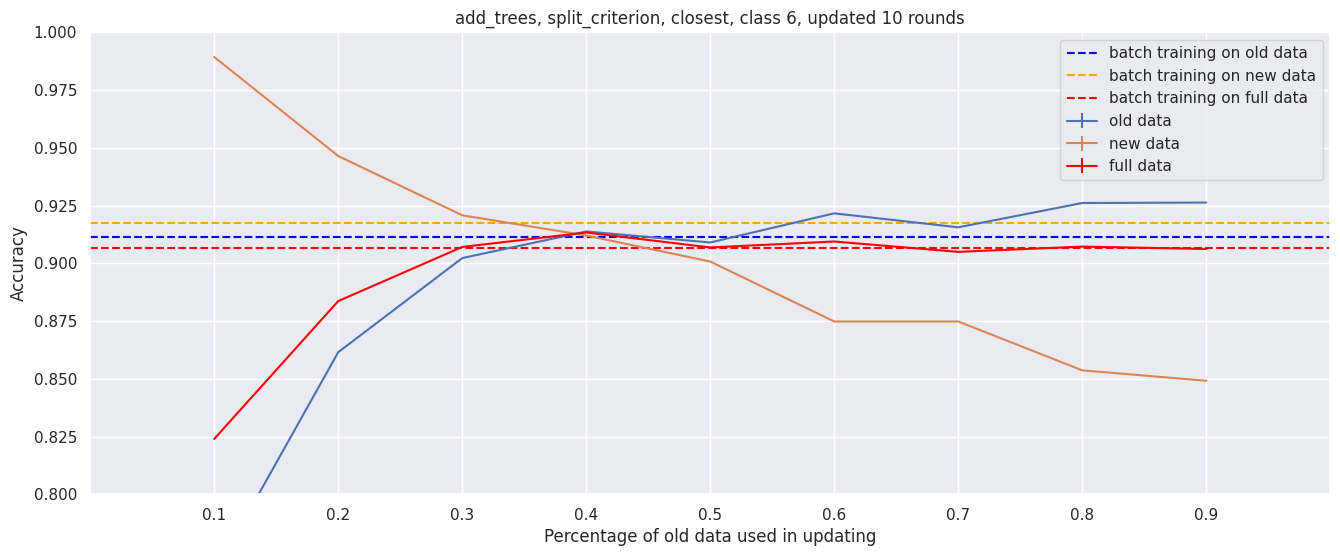

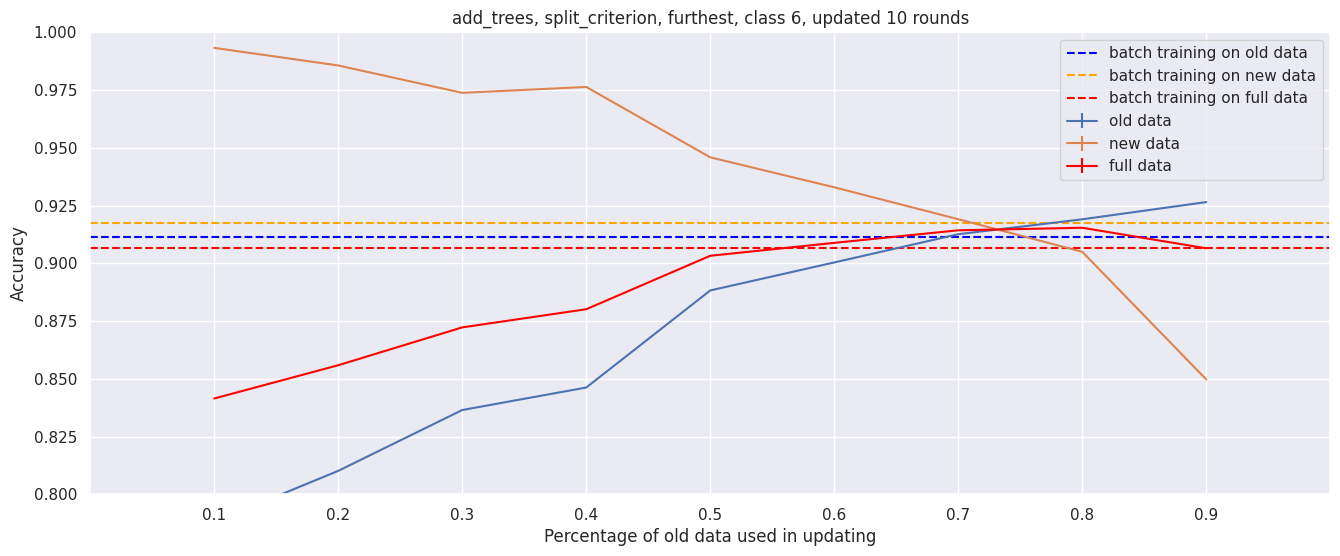

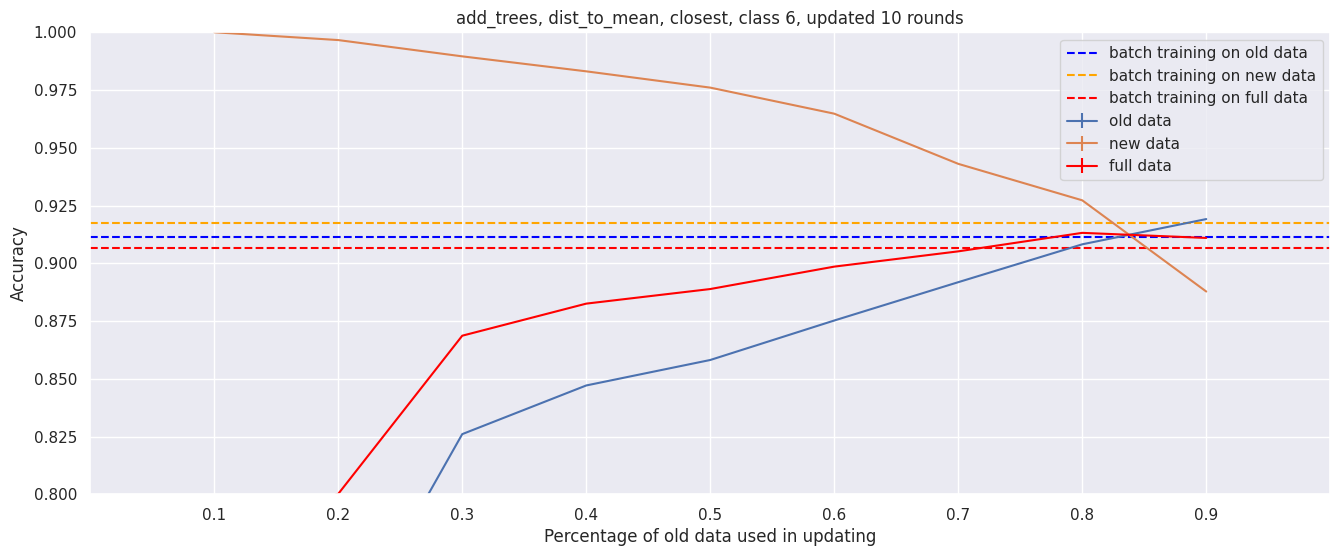

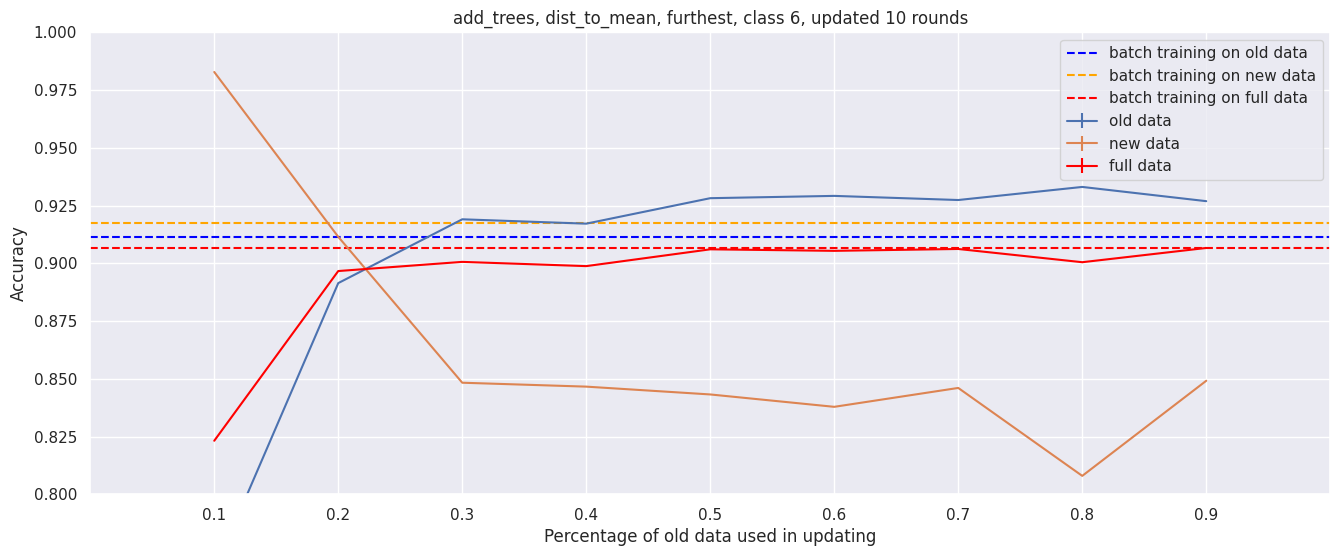

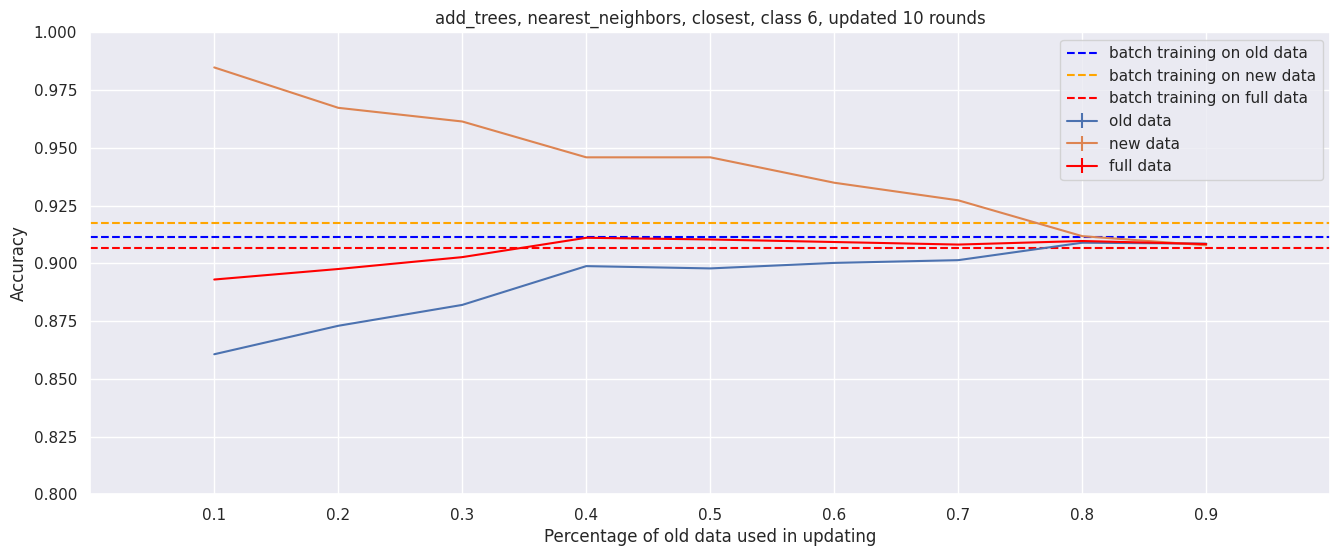

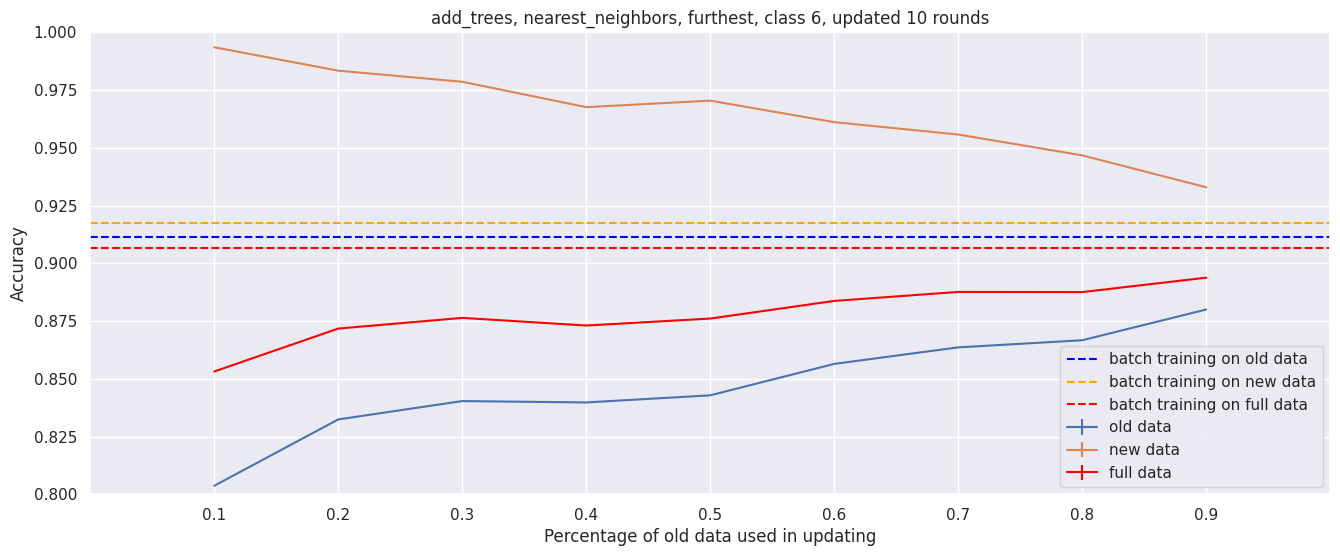

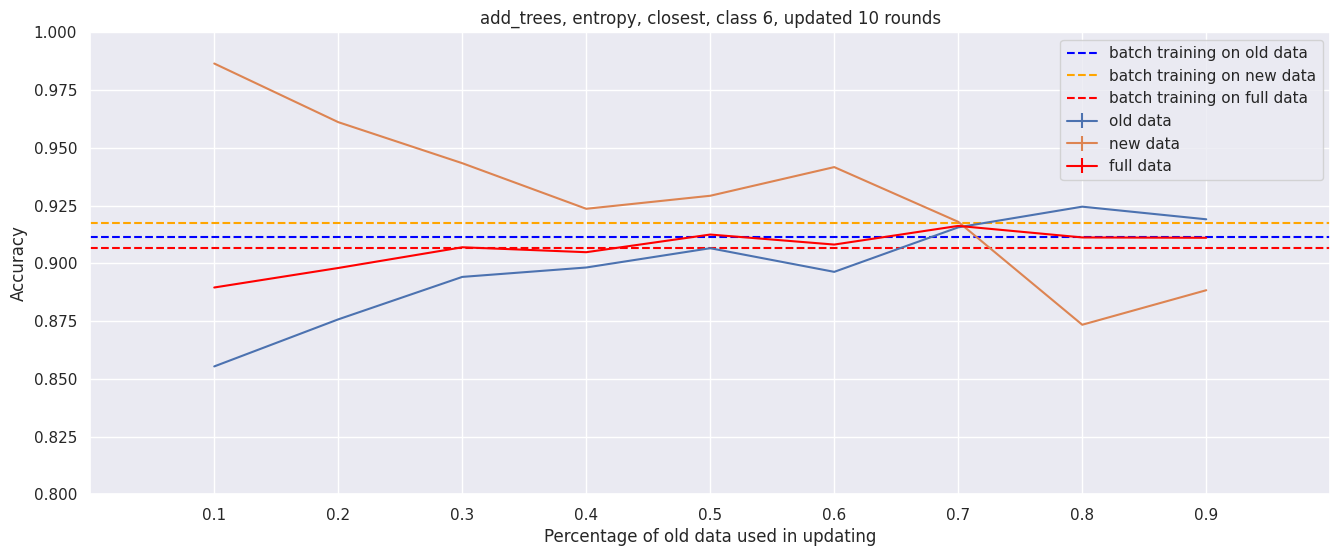

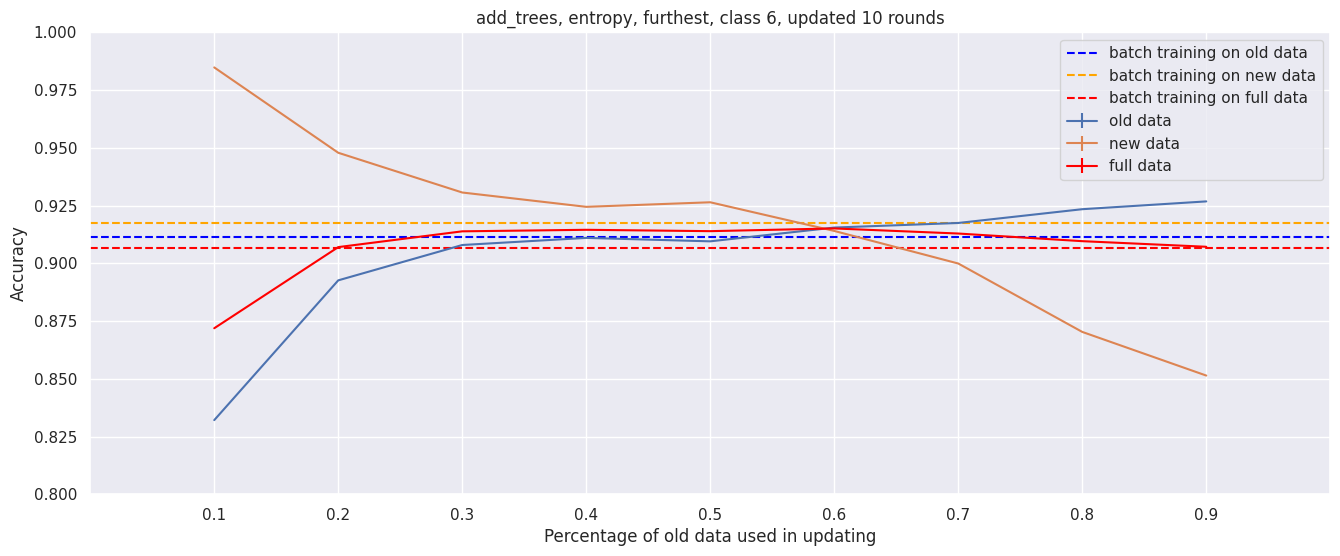

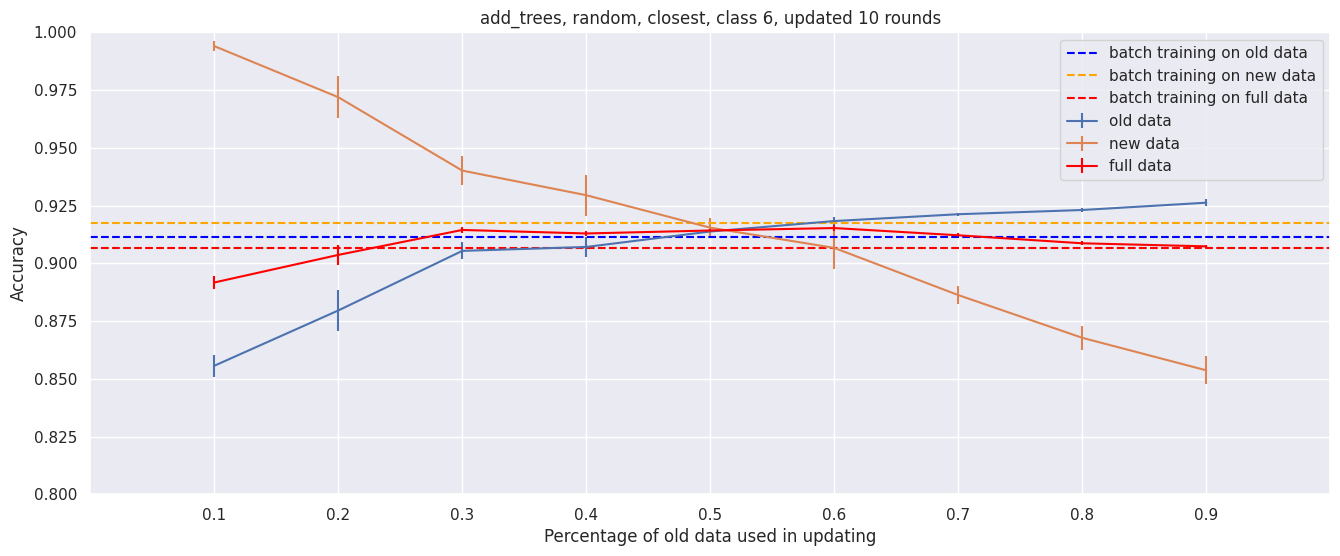

In [9]:
new_class_idx = 6

batch_results = helper_funcs.unpack_batch_results('add_trees', new_class_idx)

for data_selection_method in ['split_criterion', 'dist_to_mean', 'nearest_neighbors', 'entropy']:
    for sort_type in ['closest', 'furthest']:
        experiment_results = helper_funcs.unpack_results('add_trees', data_selection_method, sort_type, new_class_idx)
        helper_funcs.plot_results('add_trees', experiment_results, batch_results, data_selection_method, sort_type, new_class_idx, save=True)

# and once for random method
experiment_results = helper_funcs.unpack_results('add_trees', 'random', 'closest', new_class_idx)
helper_funcs.plot_results('add_trees', experiment_results, batch_results, 'random', 'closest', new_class_idx, save=True)